In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from pycaret.classification import *
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
import numpy as np
import joblib

import warnings
warnings.filterwarnings('ignore')

In [75]:
df = pd.read_csv("IT_customer_churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [81]:
df["TotalCharges"].max()

'999.9'

In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [6]:
df["TotalCharges2"] = pd.to_numeric(df["TotalCharges"] , errors = 'coerce')

In [7]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges         0
Churn                0
TotalCharges2       11
dtype: int64

In [8]:
df[df["TotalCharges2"].isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges2
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No,NaN
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No,NaN
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,,No,NaN
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No,NaN
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No,NaN
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No,NaN
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No,NaN
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No,NaN
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No,NaN
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,...,Yes,Yes,No,Two year,No,Mailed check,73.35,,No,NaN


In [9]:
df[df["TotalCharges2"].isna()]["TotalCharges"].iloc[0]

' '

In [10]:
df = df[df["TotalCharges"] != ' ']

In [11]:
df.drop("TotalCharges2" , axis = 1 , inplace = True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

## vizualization

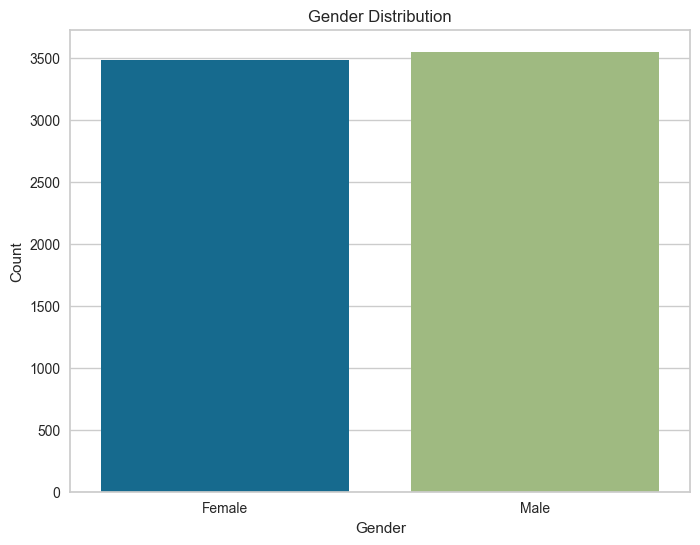

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

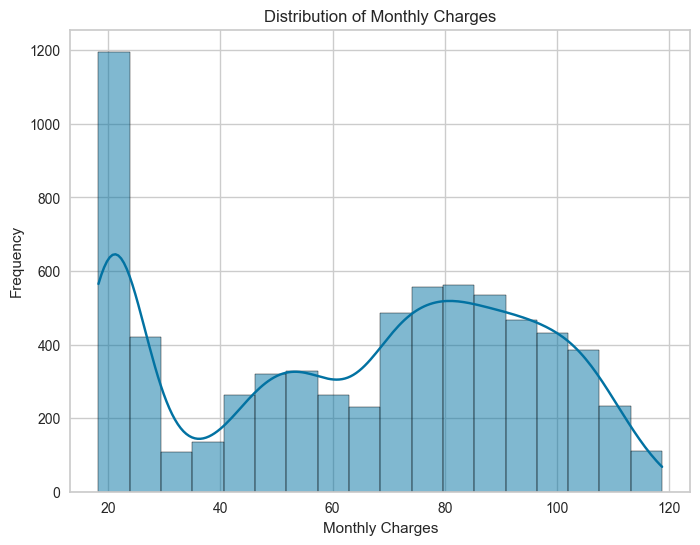

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['MonthlyCharges'], kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

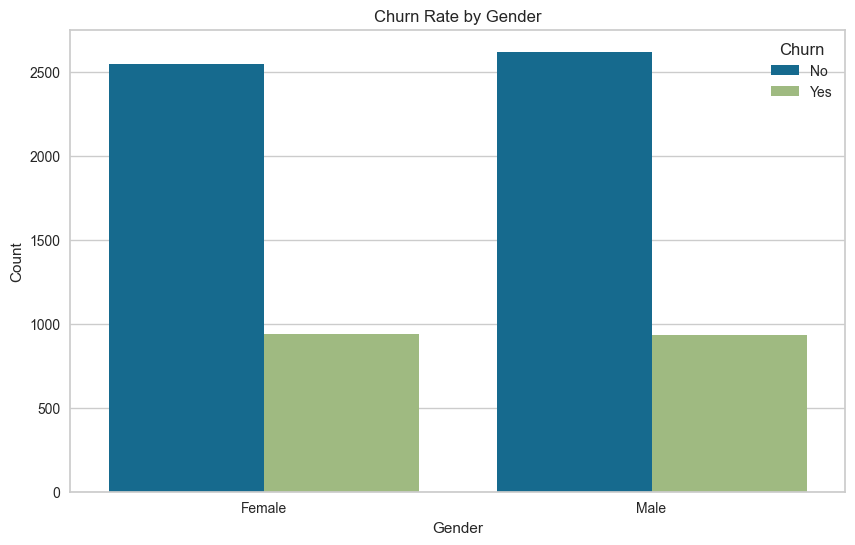

In [18]:
# 1. Churn rate by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='Churn', data=df)
plt.title('Churn Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


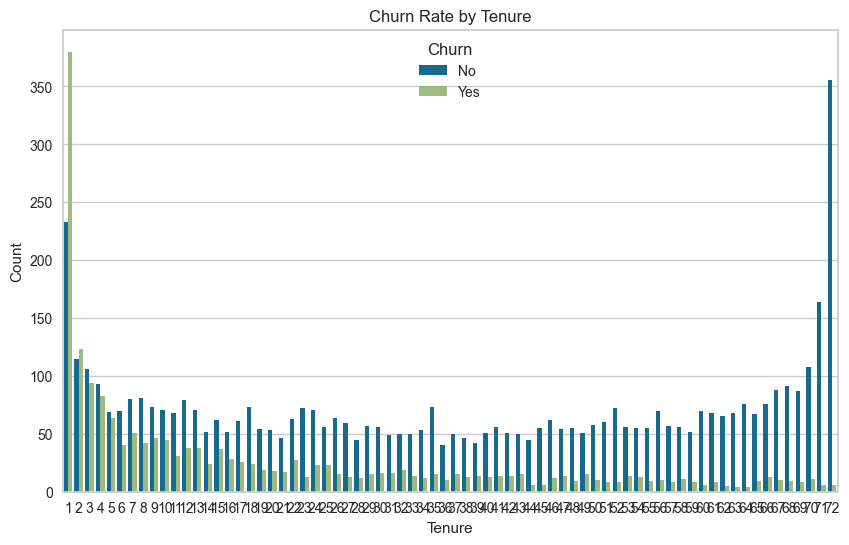

In [19]:
# 3. Churn rate by tenure
plt.figure(figsize=(10, 6))
sns.countplot(x='tenure', hue='Churn', data=df)
plt.title('Churn Rate by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()



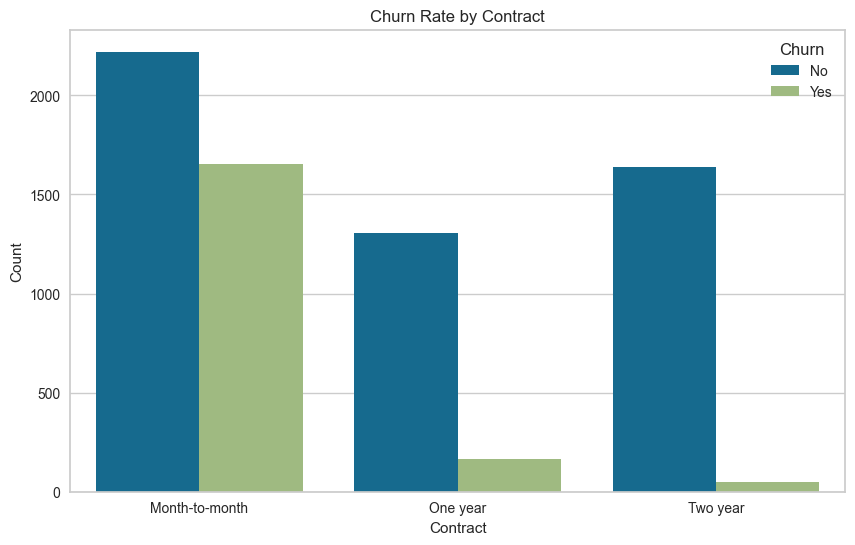

In [20]:
# 4. Churn rate by number of products
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn Rate by Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()


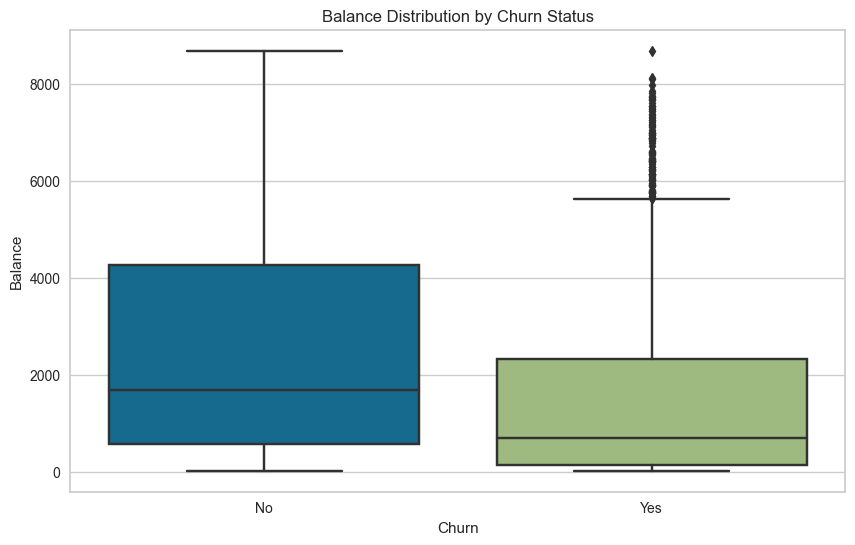

In [21]:
# 6. Churn rate by balance
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Balance Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()



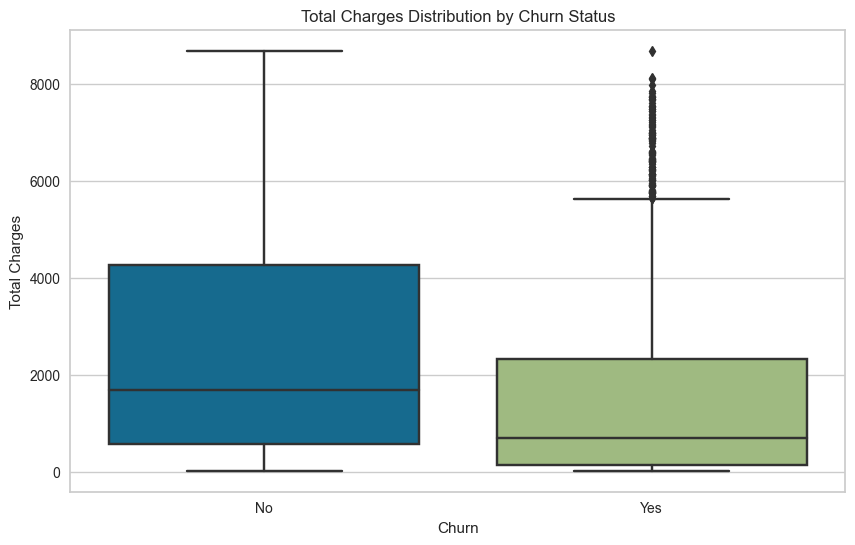

In [22]:
# 7. Churn rate by estimated salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Total Charges Distribution by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()


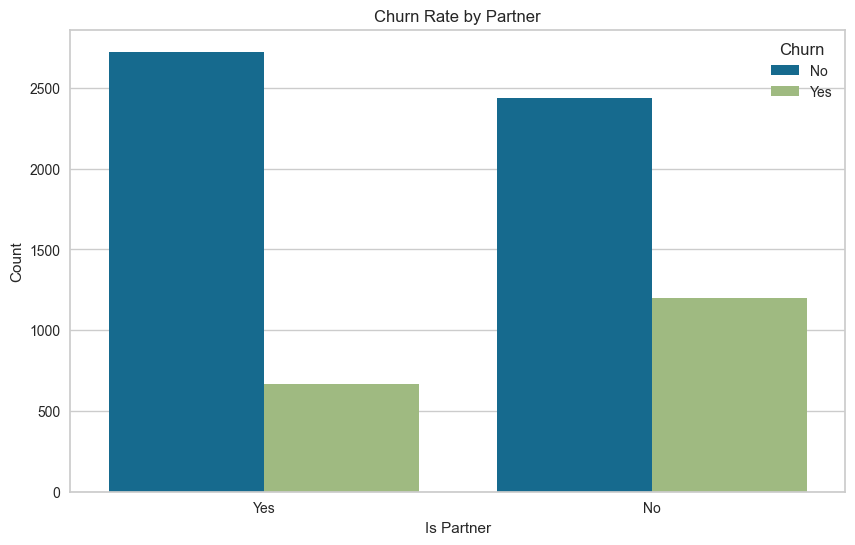

In [23]:
# 8. Churn rate by active membership
plt.figure(figsize=(10, 6))
sns.countplot(x='Partner', hue='Churn', data=df)
plt.title('Churn Rate by Partner')
plt.xlabel('Is Partner')
plt.ylabel('Count')
plt.show()


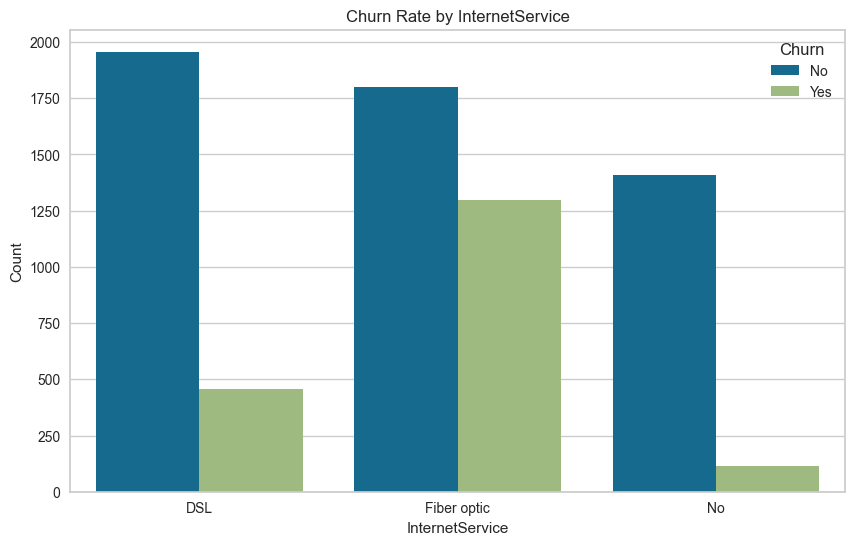

In [24]:
# 9. Churn rate by credit card ownership
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn Rate by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Count')
plt.show()

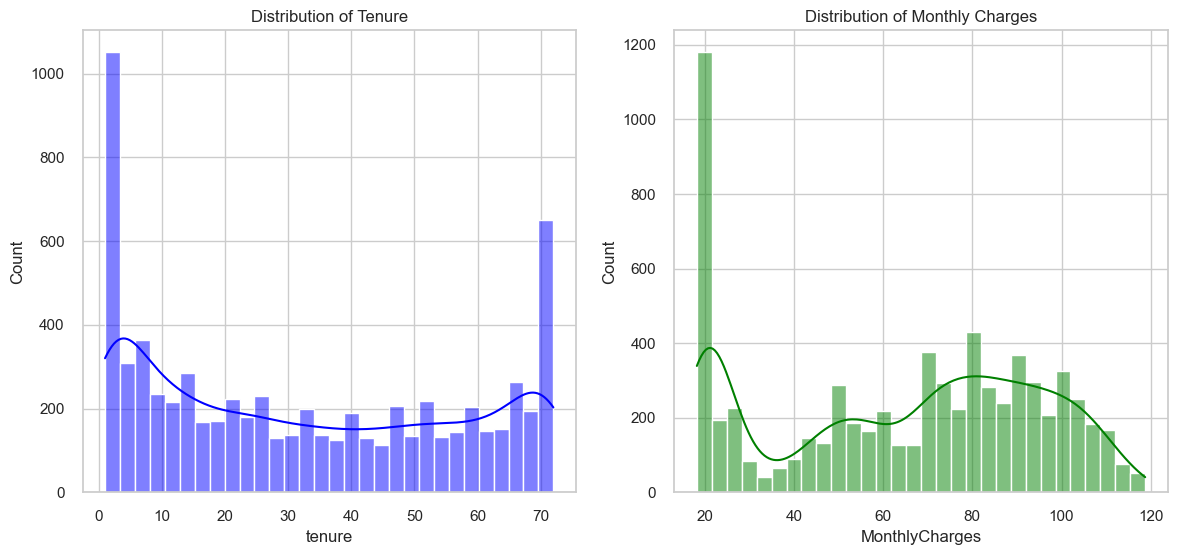

In [25]:
sns.set(style="whitegrid")

# 1. Distribution of numerical features
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], kde=True, bins=30, color='blue')
plt.title('Distribution of Tenure')

plt.subplot(1, 2, 2)
sns.histplot(df['MonthlyCharges'], kde=True, bins=30, color='green')
plt.title('Distribution of Monthly Charges')

plt.show()



## data pre processing 

In [26]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [33]:
print_unique_col_values(df)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [28]:
df.replace("No internet service","No",inplace=True)
df.replace("No phone service","No",inplace=True)

In [30]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

In [109]:
print_unique_col_values(df)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [34]:
for col in df:
    print(f'{col}: {df[col].unique()}') 

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [32]:
df['gender'].replace({'Male': 1,'Female': 0},inplace=True)

In [35]:
df = pd.get_dummies(df,['Contract','PaymentMethod','InternetService'])

In [36]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     7032 non-null   int64  
 1   SeniorCitizen                              7032 non-null   int64  
 2   Partner                                    7032 non-null   int64  
 3   Dependents                                 7032 non-null   int64  
 4   tenure                                     7032 non-null   int64  
 5   PhoneService                               7032 non-null   int64  
 6   MultipleLines                              7032 non-null   int64  
 7   OnlineSecurity                             7032 non-null   int64  
 8   OnlineBackup                               7032 non-null   int64  
 9   DeviceProtection                           7032 non-null   int64  
 10  TechSupport                  

## Missing_Values

In [38]:
df.isnull().sum()

gender                                       0
SeniorCitizen                                0
Partner                                      0
Dependents                                   0
tenure                                       0
PhoneService                                 0
MultipleLines                                0
OnlineSecurity                               0
OnlineBackup                                 0
DeviceProtection                             0
TechSupport                                  0
StreamingTV                                  0
StreamingMovies                              0
PaperlessBilling                             0
MonthlyCharges                               0
TotalCharges                                 0
Churn                                        0
Contract_DSL                                 0
Contract_Fiber optic                         0
Contract_No                                  0
PaymentMethod_Month-to-month                 0
PaymentMethod

## outliers:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   gender                                     7032 non-null   int64  
 1   SeniorCitizen                              7032 non-null   int64  
 2   Partner                                    7032 non-null   int64  
 3   Dependents                                 7032 non-null   int64  
 4   tenure                                     7032 non-null   int64  
 5   PhoneService                               7032 non-null   int64  
 6   MultipleLines                              7032 non-null   int64  
 7   OnlineSecurity                             7032 non-null   int64  
 8   OnlineBackup                               7032 non-null   int64  
 9   DeviceProtection                           7032 non-null   int64  
 10  TechSupport                  

In [40]:
df1 = df[[ "tenure" , "MonthlyCharges" , "TotalCharges"]]

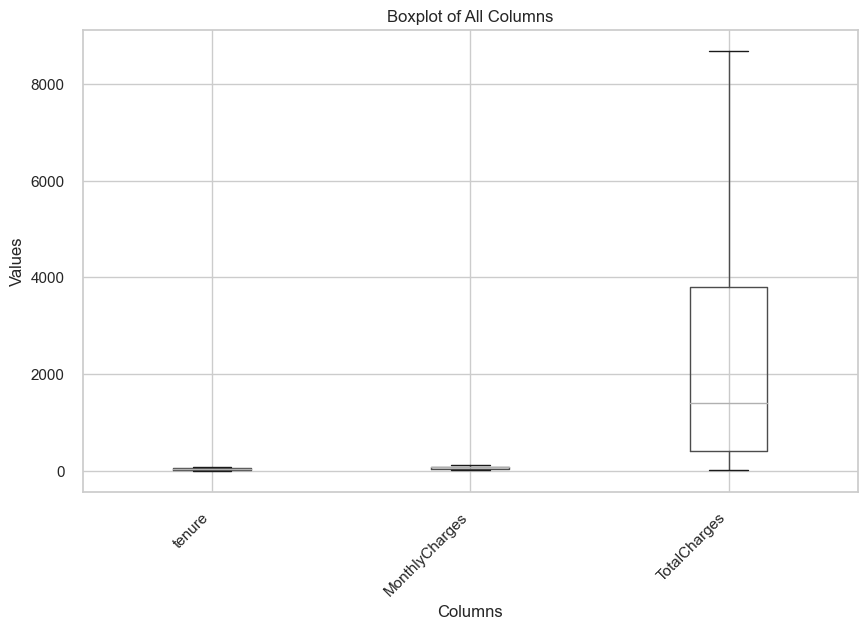

In [41]:
# Step 2: Generate boxplots for each column in the DataFrame
df1.boxplot(rot=90, figsize=(10, 6))
plt.title('Boxplot of All Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

## scalling:

In [50]:
df1 = df[[ "tenure" , "MonthlyCharges" , "TotalCharges"]]

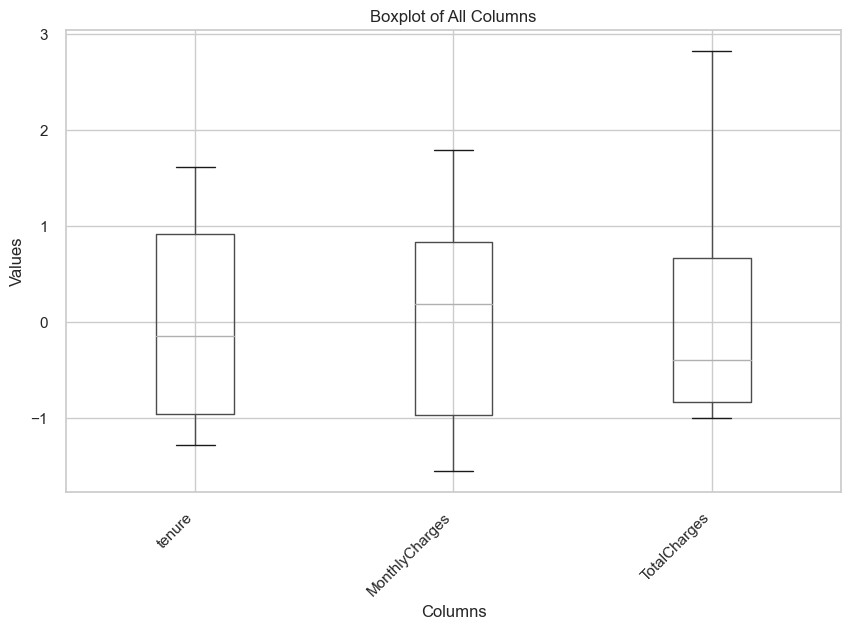

In [51]:
# Step 2: Generate boxplots for each column in the DataFrame
df1.boxplot(rot=90, figsize=(10, 6))
plt.title('Boxplot of All Columns')
plt.ylabel('Values')
plt.xlabel('Columns')
plt.xticks(rotation=45, ha='right')
plt.show()

In [44]:
scaler = StandardScaler()
df['TotalCharges'] = scaler.fit_transform(df[['TotalCharges']])

In [48]:
df['MonthlyCharges'] = scaler.fit_transform(df[['MonthlyCharges']])

In [49]:
df['tenure'] = scaler.fit_transform(df[['tenure']])

In [52]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_DSL,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check
0,0,0,1,0,-1.280248,0,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,0.064303,1,0,1,0,1,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,-1.239504,1,0,1,1,0,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,0.512486,0,0,1,0,1,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,-1.239504,1,0,0,0,0,...,False,True,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.343137,1,1,1,0,1,...,True,False,False,False,True,False,False,False,False,True
7039,0,0,1,1,1.612573,1,1,0,1,1,...,False,True,False,False,True,False,False,True,False,False
7040,0,0,1,1,-0.872808,0,0,1,0,0,...,True,False,False,True,False,False,False,False,True,False
7041,1,1,1,0,-1.158016,1,1,0,0,0,...,False,True,False,True,False,False,False,False,False,True


## imbalance data

In [53]:
df['Churn'].value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [54]:
X = df.drop('Churn',axis='columns')
y = df['Churn']

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [56]:
df = pd.merge(X_sm , y_sm , right_index = True , left_index = True)

In [57]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Fiber optic,Contract_No,PaymentMethod_Month-to-month,PaymentMethod_One year,PaymentMethod_Two year,InternetService_Bank transfer (automatic),InternetService_Credit card (automatic),InternetService_Electronic check,InternetService_Mailed check,Churn
0,0,0,1,0,-1.280248,0,0,0,1,0,...,False,False,True,False,False,False,False,True,False,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,False,False,False,True,False,False,False,False,True,0
2,1,0,0,0,-1.239504,1,0,1,1,0,...,False,False,True,False,False,False,False,False,True,1
3,1,0,0,0,0.512486,0,0,1,0,1,...,False,False,False,True,False,True,False,False,False,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10321,1,0,0,0,-1.280248,1,0,0,0,0,...,False,True,True,False,False,False,False,False,True,1
10322,0,0,0,0,-1.280248,1,1,0,0,0,...,True,False,True,False,False,False,False,False,True,1
10323,0,1,1,0,0.052984,1,1,0,1,1,...,True,False,True,False,False,False,False,True,False,1
10324,0,0,0,0,-1.220756,1,0,0,0,0,...,True,False,True,False,False,False,False,True,False,1


## pycaret

In [58]:
setup(data = df ,target = 'Churn',session_id = 123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(10326, 27)"
4,Transformed data shape,"(10326, 27)"
5,Transformed train set shape,"(7228, 27)"
6,Transformed test set shape,"(3098, 27)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [59]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.8332,0.9102,0.8536,0.8205,0.8366,0.6663,0.6671,0.1190
rf,Random Forest Classifier,0.8314,0.9088,0.8550,0.8166,0.8353,0.6627,0.6636,0.1270
xgboost,Extreme Gradient Boosting,0.8237,0.9045,0.8475,0.8091,0.8278,0.6475,0.6484,0.0400
lightgbm,Light Gradient Boosting Machine,0.8226,0.9046,0.8550,0.8033,0.8282,0.6453,0.6468,0.5490
lr,Logistic Regression,0.8078,0.8933,0.8384,0.7902,0.8135,0.6157,0.6170,0.4380
lda,Linear Discriminant Analysis,0.8078,0.8935,0.8351,0.7921,0.8129,0.6157,0.6168,0.0060
ridge,Ridge Classifier,0.8076,0.8925,0.8381,0.7900,0.8133,0.6151,0.6164,0.0050
gbc,Gradient Boosting Classifier,0.8056,0.8864,0.8379,0.7872,0.8117,0.6112,0.6126,0.1950
knn,K Neighbors Classifier,0.7969,0.8678,0.8871,0.7518,0.8138,0.5938,0.6038,0.0190
svm,SVM - Linear Kernel,0.7948,0.8857,0.8404,0.7721,0.8033,0.5897,0.5946,0.0250


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [60]:
rf = create_model('rf')      
et  = create_model('et')  
qda = create_model('qda')

#blending 3 models
blend = blend_models(estimator_list=[rf,et,qda])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8216,0.9007,0.8343,0.8140,0.8240,0.6431,0.6433
1,0.8285,0.9021,0.8536,0.8132,0.8329,0.6570,0.6578
2,0.8437,0.9180,0.8619,0.8320,0.8467,0.6874,0.6878
3,0.8257,0.9064,0.8453,0.8138,0.8293,0.6514,0.6519
4,0.8050,0.8926,0.8227,0.7941,0.8082,0.6100,0.6104
5,0.8257,0.9085,0.8698,0.7990,0.8329,0.6515,0.6541
6,0.8326,0.9071,0.8698,0.8093,0.8385,0.6653,0.6672
7,0.8423,0.9192,0.8726,0.8225,0.8468,0.6847,0.6859
8,0.8657,0.9322,0.8753,0.8587,0.8669,0.7313,0.7314


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8271,0.9066,0.8398,0.8194,0.8295,0.6542,0.6544
1,0.8326,0.9024,0.8536,0.8196,0.8363,0.6653,0.6658
2,0.8506,0.9224,0.8591,0.8451,0.8521,0.7012,0.7013
3,0.8285,0.9028,0.8287,0.8287,0.8287,0.6570,0.6570
4,0.8022,0.8919,0.8310,0.7853,0.8075,0.6045,0.6055
5,0.8202,0.9080,0.8615,0.7954,0.8271,0.6404,0.6426
6,0.8423,0.9117,0.8753,0.8208,0.8472,0.6847,0.6862
7,0.8534,0.9220,0.8753,0.8382,0.8564,0.7068,0.7075
8,0.8573,0.9319,0.8587,0.8564,0.8575,0.7147,0.7147


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5007,0.6817,1.0000,0.5007,0.6673,0.0000,0.0000
1,0.5007,0.3588,1.0000,0.5007,0.6673,0.0000,0.0000
2,0.5007,0.5055,1.0000,0.5007,0.6673,0.0000,0.0000
3,0.5007,0.6686,1.0000,0.5007,0.6673,0.0000,0.0000
4,0.4993,0.5834,1.0000,0.4993,0.6661,0.0000,0.0000
5,0.4993,0.7621,1.0000,0.4993,0.6661,0.0000,0.0000
6,0.4993,0.6729,1.0000,0.4993,0.6661,0.0000,0.0000
7,0.4993,0.3893,1.0000,0.4993,0.6661,0.0000,0.0000
8,0.5000,0.3098,1.0000,0.5000,0.6667,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7801,0.9086,0.9503,0.7093,0.8123,0.5600,0.5955
1,0.7801,0.9060,0.9530,0.7084,0.8127,0.5600,0.5968
2,0.7939,0.9244,0.9641,0.7196,0.8241,0.5876,0.6250
3,0.7718,0.9091,0.9724,0.6943,0.8101,0.5433,0.5932
4,0.7815,0.8963,0.9557,0.7084,0.8137,0.5631,0.6008
5,0.7649,0.9119,0.9668,0.6884,0.8041,0.5300,0.5793
6,0.7718,0.9142,0.9557,0.6984,0.8070,0.5438,0.5848
7,0.8091,0.9253,0.9751,0.7318,0.8361,0.6184,0.6556
8,0.7964,0.9359,0.9778,0.7175,0.8277,0.5928,0.6362


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [61]:
tuned_rf = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7759,0.8516,0.8508,0.7404,0.7918,0.5518,0.5580
1,0.7842,0.8479,0.8425,0.7550,0.7963,0.5684,0.5723
2,0.7815,0.8547,0.8315,0.7563,0.7921,0.5629,0.5657
3,0.7718,0.8478,0.8232,0.7469,0.7832,0.5435,0.5464
4,0.7414,0.8320,0.7784,0.7242,0.7503,0.4828,0.4841
5,0.7884,0.8554,0.8643,0.7500,0.8031,0.5769,0.5836
6,0.7870,0.8568,0.8393,0.7594,0.7974,0.5741,0.5773
7,0.7801,0.8676,0.8283,0.7551,0.7900,0.5602,0.5629
8,0.8047,0.8818,0.8421,0.7835,0.8117,0.6094,0.6111


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


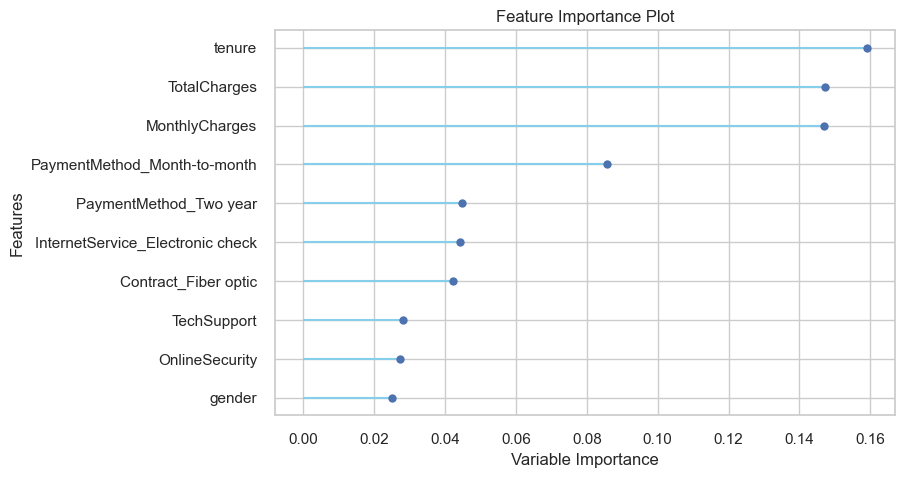

In [62]:
plot_model(estimator = tuned_rf, plot = 'feature')

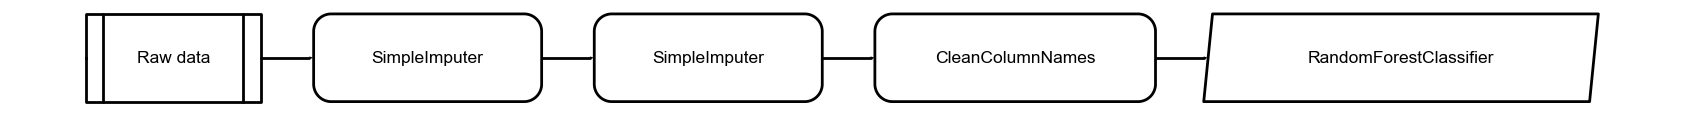

In [67]:
plot_model(estimator = rf, plot = 'pipeline')

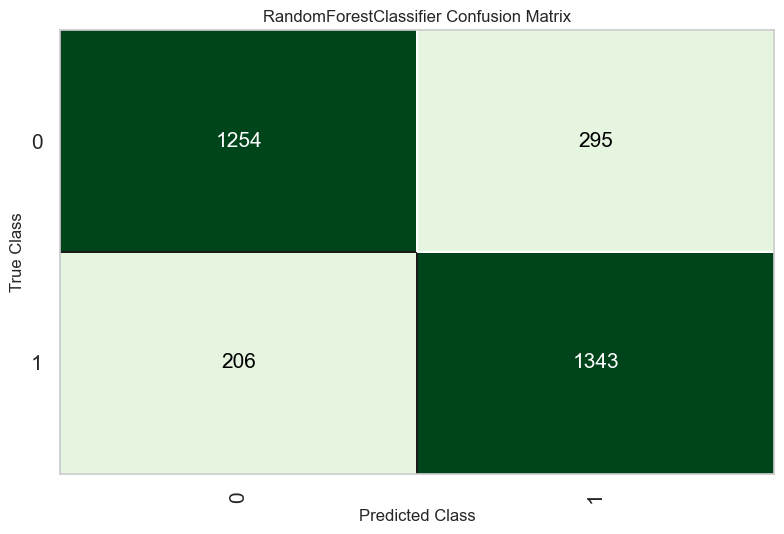

In [64]:
plot_model(estimator = rf, plot = 'confusion_matrix')

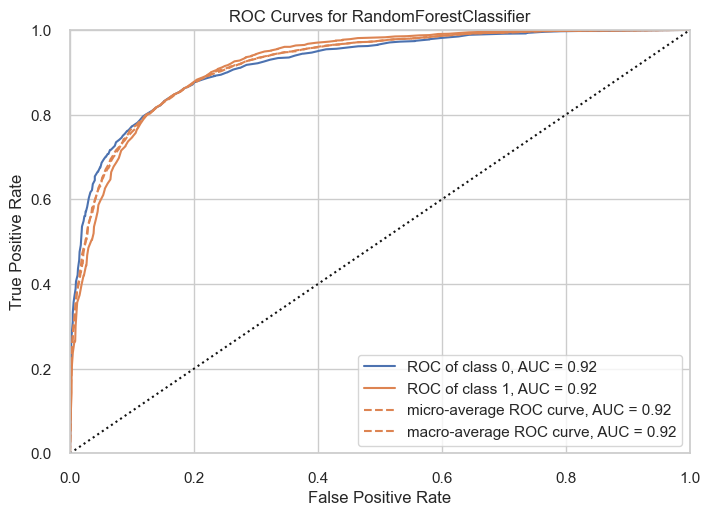

In [65]:
plot_model(rf)

## training

In [68]:
data = df.copy()

In [69]:
# Split the data into features and target variable
X = data.drop(['Churn'], axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
# Define a function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return precision, recall, f1

In [71]:
# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_et = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 62]
}

In [72]:
# Create a dictionary to hold the models and their parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), param_grid_rf),
    'Extra Trees': (ExtraTreesClassifier(random_state=42), param_grid_et),
    'XGBoost': (XGBClassifier(random_state=42), param_grid_xgb),
    'LightGBM': (LGBMClassifier(random_state=42), param_grid_lgbm)
}

In [73]:
# Initialize dictionaries to store results
results = {}

# Perform Grid Search with Cross Validation for each model
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    my_model = 'finalized_model_{}.sav'.format(model_name)
    joblib.dump(best_model, my_model)
    
    precision, recall, f1 = evaluate_model(best_model, X_test, y_test)
    
    results[model_name] = {
        'Best Params': grid_search.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4134, number of negative: 4126
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001036 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500484 -> initscore=0.001937
[LightGBM] [Info] Start training from score 0.001937
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500454 -> initscore=0.001816
[LightGBM] [Info] Start training from score 0.001816
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.036112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3308, number of negative: 3300
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003215 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500605 -> initscore=0.002421
[LightGBM] [Info] Start training from score 0.002421
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010856 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 811
[LightGBM] [Info] Number of data points in the train set: 6608, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500454 -> initscore=0.001816
[LightGBM] [Info] Start training from score 0.001816
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3307, number of negative: 3301
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=

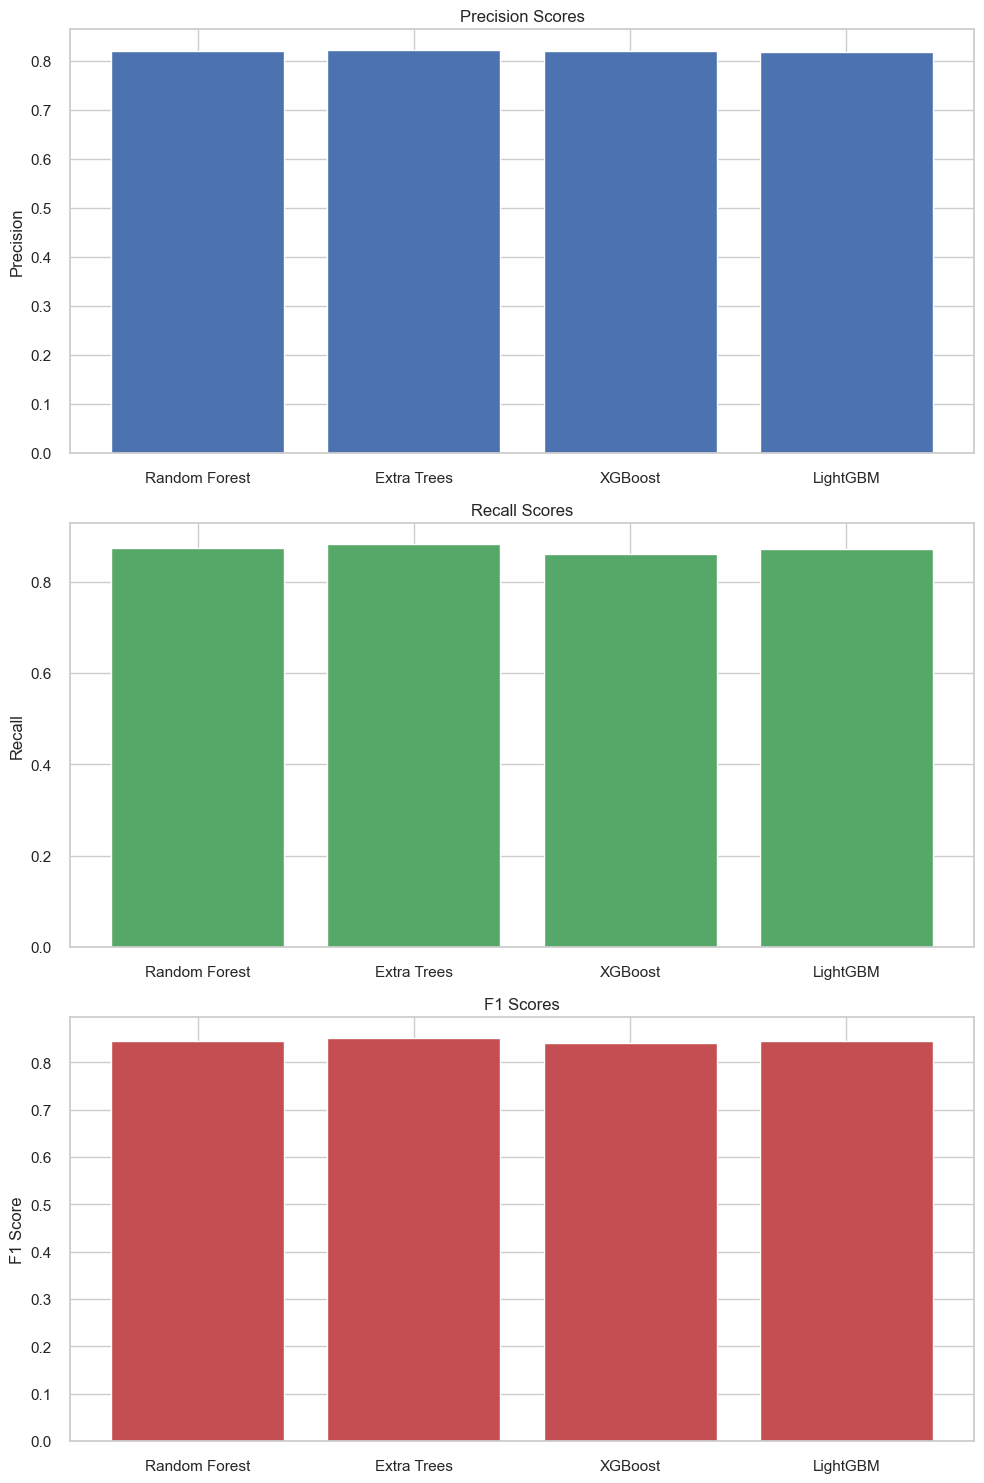

In [162]:
# Extract scores for plotting
model_names = list(results.keys())
precision_scores = [results[name]['Precision'] for name in model_names]
recall_scores = [results[name]['Recall'] for name in model_names]
f1_scores = [results[name]['F1 Score'] for name in model_names]

# Plot the bar chart
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

ax[0].bar(model_names, precision_scores, color='b')
ax[0].set_title('Precision Scores')
ax[0].set_ylabel('Precision')

ax[1].bar(model_names, recall_scores, color='g')
ax[1].set_title('Recall Scores')
ax[1].set_ylabel('Recall')

ax[2].bar(model_names, f1_scores, color='r')
ax[2].set_title('F1 Scores')
ax[2].set_ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [163]:
results

{'Random Forest': {'Best Params': {'max_depth': 20,
   'min_samples_split': 2,
   'n_estimators': 200},
  'Precision': 0.8193430656934306,
  'Recall': 0.8726919339164237,
  'F1 Score': 0.8451764705882353},
 'Extra Trees': {'Best Params': {'max_depth': 20,
   'min_samples_split': 2,
   'n_estimators': 200},
  'Precision': 0.8233695652173914,
  'Recall': 0.8833819241982507,
  'F1 Score': 0.8523206751054853},
 'XGBoost': {'Best Params': {'learning_rate': 0.2,
   'max_depth': 10,
   'n_estimators': 100},
  'Precision': 0.8196114708603145,
  'Recall': 0.8610301263362488,
  'F1 Score': 0.8398104265402844},
 'LightGBM': {'Best Params': {'learning_rate': 0.2,
   'n_estimators': 200,
   'num_leaves': 31},
  'Precision': 0.8190127970749543,
  'Recall': 0.8707482993197279,
  'F1 Score': 0.8440885539331136}}

In [164]:
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_DSL',
       'Contract_Fiber optic', 'Contract_No', 'PaymentMethod_Month-to-month',
       'PaymentMethod_One year', 'PaymentMethod_Two year',
       'InternetService_Bank transfer (automatic)',
       'InternetService_Credit card (automatic)',
       'InternetService_Electronic check', 'InternetService_Mailed check'],
      dtype='object')

In [165]:
X["SeniorCitizen"].value_counts()

SeniorCitizen
0    8536
1    1790
Name: count, dtype: int64

In [166]:
joblib.dump(scaler, 'std_scaler_churn.bin', compress=True)


['std_scaler_churn.bin']